# Work in progress - may or may not keep this plot

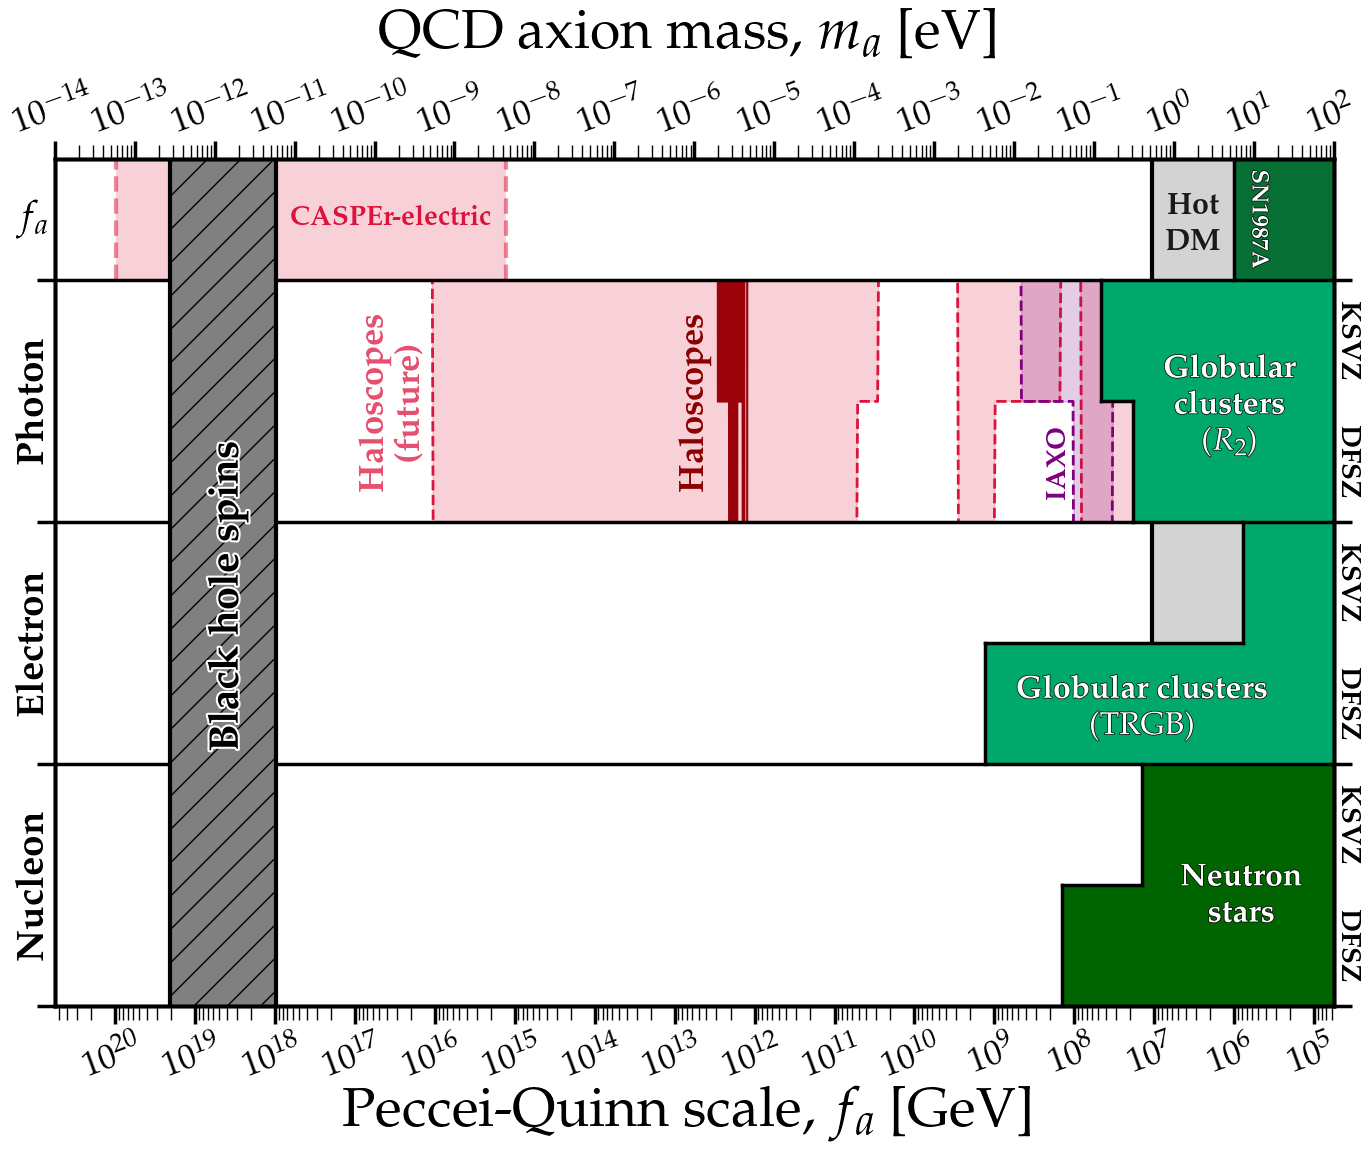

In [439]:
%matplotlib inline
from PlotFuncs import MySaveFig, FigSetup, line_background
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *

fs_large = 40
fs1 = 20
fs2 = 28
lw1 = 2.5
m_max = 1e2
m_min = 1e-14

fig,ax = FigSetup(Shape='Rectangular',xlab='',ylab='',mathpazo=True,\
                              g_min=1e-17,g_max=1e-2,m_min=m_min,m_max=m_max,\
                          TopAndRightTicks=True,xtick_rotation=20)

#ax.tick_params(which='major',length=0)
ax.tick_params(which='minor',length=0)
ax.set_xticks([])       
# ax.xaxis.set_tick_params(labeltop=False,rotation=20,pad=5)
# ax.xaxis.set_tick_params(labelbottom=False,rotation=20,pad=5)
# ax.tick_params(which='major',bottom=False)
# ax.tick_params(which='minor',bottom=False)
# ax.set_xticks([])
# ax.set_xminorticks([])

ax.set_yscale('linear')
ax.set_ylim([0,7])
ax.set_yticks([0,2,4,6])
ax.set_yticklabels([])

ax.axhline(2,color='k',lw=lw1,zorder=0)
ax.axhline(4,color='k',lw=lw1,zorder=0)
ax.axhline(6,color='k',lw=lw1,zorder=0)
#plt.text(m_max*1.5,6.5,r'{\bf QCD axion}',fontsize=fs1,ha='left',va='center')
plt.text(m_min/1.5,6.5,r'$f_a$',color='k',fontsize=fs2,rotation=0,ha='right',va='center')


plt.text(m_max*1,5.5,r'{\bf KSVZ}',fontsize=fs1,ha='left',va='center',rotation=-90)
plt.text(m_max*1,4.5,r'{\bf DFSZ}',fontsize=fs1,ha='left',va='center',rotation=-90)
plt.text(m_min,5,r'{\bf Photon}',color='k',fontsize=fs2,rotation=90,ha='right',va='center')

plt.text(m_max*1,3.5,r'{\bf KSVZ}',fontsize=fs1,ha='left',va='center',rotation=-90)
plt.text(m_max*1,2.5,r'{\bf DFSZ}',fontsize=fs1,ha='left',va='center',rotation=-90)
plt.text(m_min,3,r'{\bf Electron}',color='k',fontsize=fs2,rotation=90,ha='right',va='center')

plt.text(m_max*1,1.5,r'{\bf KSVZ}',fontsize=fs1,ha='left',va='center',rotation=-90)
plt.text(m_max*1,0.5,r'{\bf DFSZ}',fontsize=fs1,ha='left',va='center',rotation=-90)
plt.text(m_min,1,r'{\bf Nucleon}',color='k',fontsize=fs2,rotation=90,ha='right',va='center')

plt.gcf().text(0.51,0.98,'QCD axion mass, $m_a$ [eV]',fontsize=fs_large,ha='center')

plt.gcf().text(0.51,0.00,r'Peccei-Quinn scale, $f_a$ [GeV]',fontsize=fs_large,ha='center')


def MassLimits(CouplingFunction,dat,m_min = 1e-20,m_max = 1e3,nvals=1000,Inverted=False):
    mvals = logspace(log10(m_min),log10(m_max),nvals)
    g = CouplingFunction(mvals)
    glim = 10.0**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    m_min = mvals[g>glim][0]
    m_max = mvals[g>glim][-1]
    if Inverted:
        m_min = mvals[g<glim][0]
        m_max = mvals[g<glim][-1]
    return m_min,m_max




dat = loadtxt('limit_data/fa/SN1987A.txt')
m1 = dat[0,1]*(1e12*5.7e-6)
plt.fill_between([m1,m_max],[6,6],y2=7,color='#067034',alpha=1,zorder=-1)
plt.plot([m1,m1],[6,7],'-',lw=2.5,color='k',alpha=1)



inv_fa = lambda m_a : ((1/1e12)*(m_a/5.7e-6))
dat = loadtxt('limit_data/fa/Projections/CASPEr-electric-PhaseIII.txt')
m1,m2 = MassLimits(inv_fa,dat)
plt.fill_between([m1,m2],[6,6],y2=7,color='crimson',alpha=0.2,zorder=-1,lw=0)
plt.plot([m1,m1],[6,7],'--',lw=3,color='crimson',alpha=0.5,zorder=-1)
plt.plot([m2,m2],[6,7],'--',lw=3,color='crimson',alpha=0.5,zorder=-1)

dat = loadtxt('limit_data/fa/BlackHoleSpins_Baryakhtar.txt')
m1,m2 = MassLimits(inv_fa,dat,Inverted=True)
plt.fill_between([m1,m2],[0,0],y2=7,color='gray',alpha=1,zorder=1,hatch='/',edgecolor='k')
plt.plot([m1,m1],[0,7],'-',lw=3,color='k',alpha=1)
plt.plot([m2,m2],[0,7],'-',lw=3,color='k',alpha=1)

plt.fill_between([0.53,m_max],[0,0],y2=7,color='lightgray',alpha=1,zorder=-10)
plt.plot([0.53,0.53],[0,7],'-',lw=3,color='k',alpha=1,zorder=-10)


dat = loadtxt('limit_data/AxionPhoton/Haloscopes_Combined_microeV-meV.txt')
C = dat[:,1]/(2e-10*dat[:,0])
Cround = C*1
Cround[Cround>1.92] = 6
Cround[Cround<0.75] = 4
Cround[Cround<1.92] = 5
plt.fill_between(dat[:,0],Cround,y2=6,color='darkred',zorder=-10)

dat = loadtxt('limit_data/AxionPhoton/Projections/HaloscopeProjections_Combined.txt')
C = dat[:,1]/(2e-10*dat[:,0])
Cround = C*1
Cround[Cround>1.92] = 6
Cround[Cround<0.75] = 4
Cround[Cround<1.92] = 5
plt.fill_between(dat[:,0],Cround,y2=6,color='crimson',alpha=0.2,zorder=-10)
plt.plot(dat[:,0],Cround,'--',color='crimson',lw=2,zorder=-10)

dat = loadtxt('limit_data/AxionPhoton/Projections/IAXO.txt')
mvals = logspace(log10(m_min),log10(m_max),nvals)
glim = 10.0**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
dat = column_stack((mvals,glim))
C = dat[:,1]/(2e-10*dat[:,0])
Cround = C*1
Cround[Cround>1.92] = 6
Cround[Cround<0.75] = 4
Cround[Cround<1.92] = 5
plt.fill_between(dat[:,0],Cround,y2=6,color='purple',alpha=0.2,zorder=-10)
plt.plot(dat[:,0],Cround,'--',color='purple',lw=2,zorder=-10)

dat = loadtxt('limit_data/AxionPhoton/GlobularClusters.txt')
m1 = dat[0,1]/(2e-10*1.92)
plt.fill_between([m1,m_max],[5,5],y2=6,color=[0.0, 0.66, 0.42],alpha=1,zorder=-1)
plt.plot([m1,m1],[5,6],'-',lw=2.5,color='k',alpha=1)
m1 = dat[0,1]/(2e-10*0.75)
plt.fill_between([m1,m_max],[4,4],y2=5,color=[0.0, 0.66, 0.42],alpha=1,zorder=-1)
plt.plot([m1,m1],[4,5],'-',lw=2.5,color='k',alpha=1)
plt.plot([dat[0,1]/(2e-10*0.75),dat[0,1]/(2e-10*1.92)],[5,5],'k-',lw=2.5)



# electron
dat = loadtxt('limit_data/AxionElectron/RedGiants_HighMass.txt')
m1 = dat[0,1]/(8.943e-11*2e-4)
plt.fill_between([m1,m_max],[3,3],y2=4,color=[0.0, 0.66, 0.42],alpha=1,zorder=-1)
plt.plot([m1,m1],[3,4],'-',lw=2.5,color='k',alpha=1)
m1 = dat[0,1]/(8.943e-11*1.0/3.0)
plt.fill_between([m1,m_max],[2,2],y2=3,color=[0.0, 0.66, 0.42],alpha=1,zorder=-1)
plt.plot([m1,m1],[2,3],'-',lw=2.5,color='k',alpha=1)
plt.plot([dat[0,1]/(8.943e-11*1.0/3.0),dat[0,1]/(8.943e-11*2e-4)],[3,3],'k-',lw=2.5)

# nucleon
dat = loadtxt('limit_data/AxionNeutron/NeutronStars.txt')
m1 = dat[0,1]/(1.644e-7*0.02)
plt.fill_between([m1,m_max],[1,1],y2=2,color='DarkGreen',alpha=1,zorder=-1)
plt.plot([m1,m1],[1,2],'-',lw=2.5,color='k',alpha=1)
m1 = dat[0,1]/(1.644e-7*0.2)
plt.fill_between([m1,m_max],[0,0],y2=1,color='DarkGreen',alpha=1,zorder=-1)
plt.plot([m1,m1],[0,1],'-',lw=2.5,color='k',alpha=1)
plt.plot([dat[0,1]/(1.644e-7*0.02),dat[0,1]/(1.644e-7*0.2)],[1,1],'k-',lw=2.5)

ax_PQ = ax.twiny()
ax_PQ.set_xscale('log')
ax_PQ.set_xlim([1e12/(m_min/5.7e-6),1e12/(m_max/5.7e-6)])
ax_mass = ax_PQ.twiny()
ax_mass.set_xscale('log')
ax_mass.set_xlim([m_min,m_max])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax_mass.xaxis.set_major_locator(locmaj)
ax_mass.xaxis.set_minor_locator(locmin)
ax_mass.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=flipud(arange(2, 10)*.1),numticks=100)
ax_PQ.xaxis.set_major_locator(locmaj)
ax_PQ.xaxis.set_minor_locator(locmin)
ax_PQ.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax_mass.tick_params(which='major',direction='out',width=2.5,length=13,rotation=20,pad=0)
ax_mass.tick_params(which='minor',direction='out',width=1,length=10)

ax_PQ.tick_params(which='major',direction='out',width=2.5,length=13,rotation=20,pad=6)
ax_PQ.tick_params(which='minor',direction='out',width=1,length=10)



ax.text(1.5e-12,2.2,r'{\bf Black hole spins}',color='k',fontsize=30,rotation=90,ha='center',path_effects=line_background(3,'w'))

ax.text(0.9e-11,6.5,r'{\bf CASPEr-electric}',color='crimson',fontsize=20,va='center')

ax.text(0.8e1,6.15,r'{\bf SN1987A}',color='w',fontsize=17,rotation=-90,path_effects=line_background(1,'k'))

ax.text(5e0,5.2,r'{\bf Globular}',color='w',fontsize=23,rotation=0,path_effects=line_background(1,'k'),ha='center')
ax.text(5e0,4.9,r'{\bf clusters}',color='w',fontsize=23,rotation=0,path_effects=line_background(1,'k'),ha='center')
ax.text(5e0,4.6,r'($R_2$)',color='w',fontsize=23,rotation=0,path_effects=line_background(1,'k'),ha='center')

ax.text(4e-1,2.55,r'{\bf Globular clusters}',color='w',fontsize=23,rotation=0,path_effects=line_background(1,'k'),ha='center')
ax.text(4e-1,2.25,r'(TRGB)',color='w',fontsize=23,rotation=0,path_effects=line_background(1,'k'),ha='center')

ax.text(0.7e1,1.0,r'{\bf Neutron}',color='w',fontsize=23,path_effects=line_background(1,'k'),ha='center')
ax.text(0.7e1,0.7,r'{\bf stars}',color='w',fontsize=23,path_effects=line_background(1,'k'),ha='center')

ax.text(1.3e-6,5,r'{\bf Haloscopes}',alpha=1,color='darkred',fontsize=25,rotation=90,rotation_mode='anchor',ha='center')

ax.text(2.5e-2,4.25,r'{\bf IAXO}',color='purple',fontsize=20,rotation=90)
ax.text(1.3e-10,5,r'{\bf Haloscopes}',alpha=0.75,color='crimson',fontsize=25,rotation=90,rotation_mode='anchor',ha='center')
ax.text(3.6e-10,5,r'{\bf (future)}',alpha=0.75,color='crimson',fontsize=25,rotation=90,rotation_mode='anchor',ha='center')

ax.text(1.8e0,6.55,r'{\bf Hot}',color=[0.1,0.1,0.1],fontsize=22,ha='center')
ax.text(1.8e0,6.25,r'{\bf DM}',color=[0.1,0.1,0.1],fontsize=22,ha='center')

MySaveFig(fig,'QCDAxion')


RBF_UF_Haloscopes
UF
ADMX
ADMX2018
ADMX2019_1
ADMX2019_2
ADMX2021
CAPP-1
CAPP-2
CAPP-3
CAPP-4
CAPP-5
CAPP-6
CAST-CAPP
HAYSTAC_highres
HAYSTAC_2020_highres
ORGAN
ORGAN-1a
TASEH
GrAHal
ADMX_Sidecar
ADMX_Sidecar_JTWPA
QUAX
QUAX2
RADES
HAYSTAC_2022


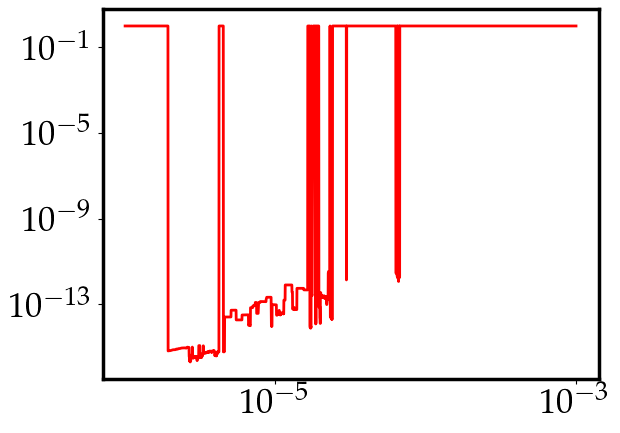

In [187]:
files = ['RBF_UF_Haloscopes','UF','ADMX','ADMX2018','ADMX2019_1','ADMX2019_2','ADMX2021',
        'CAPP-1','CAPP-2','CAPP-3','CAPP-4','CAPP-5','CAPP-6','CAST-CAPP','HAYSTAC_highres','HAYSTAC_2020_highres',
        'ORGAN','ORGAN-1a','TASEH','GrAHal','ADMX_Sidecar','ADMX_Sidecar_JTWPA',
        'QUAX','QUAX2','RADES','HAYSTAC_2022']

mmin = 1e-3
mmax = 1e-6
nvals = 3000
mvals = logspace(log10(mmin),log10(mmax),nvals)

g = zeros(shape=nvals)
for file in files:
    print(file)
    dat = loadtxt("limit_data/AxionPhoton/"+file+".txt")
    g1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    g1[mvals<amin(dat[:,0])] = inf
    g1[mvals>amax(dat[:,0])] = inf
    g = column_stack((g,g1))
g = g[:,1:]

g = amin(g,1)

g[g==inf] = 1
plt.loglog(mvals,g,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/AxionPhoton/Haloscopes_Combined_microeV-meV.txt',column_stack((mvals,g)))


TwistedAnyonCavity
LAMPOST2
WISPLC
ADMX_Projected
ADBC
aLIGO
BREAD
MADMAX
BRASS
CADEx
DANCE
DMRadio
FLASH
SRF
TOORAD_eV


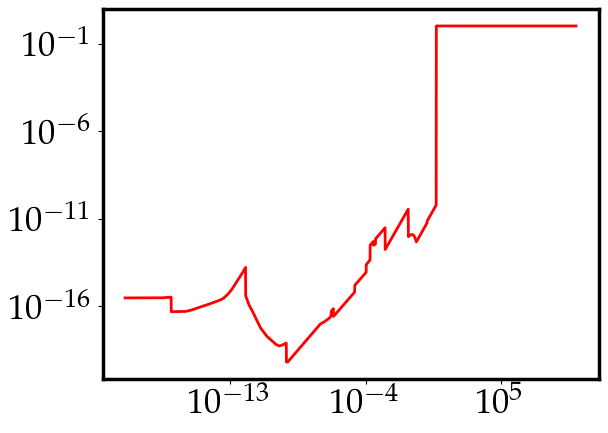

In [207]:
files = ['TwistedAnyonCavity','LAMPOST2','WISPLC','ADMX_Projected','ADBC','aLIGO','BREAD','MADMAX','BRASS','CADEx','DANCE','DMRadio','FLASH','SRF','TOORAD_eV']
mmin = 1e-20
mmax = 1e10
nvals = 3000
mvals = logspace(log10(mmin),log10(mmax),nvals)

g = zeros(shape=nvals)
for file in files:
    print(file)
    dat = loadtxt("limit_data/AxionPhoton/Projections/"+file+".txt")
    g1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    g1[mvals<amin(dat[:,0])] = inf
    g1[mvals>amax(dat[:,0])] = inf
    g = column_stack((g,g1))
g = g[:,1:]

g = amin(g,1)

g[g==inf] = 1
plt.loglog(mvals,g,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/AxionPhoton/Projections/HaloscopeProjections_Combined.txt',column_stack((mvals,g)))
